In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_train = joblib.load('../outputs/models/train_data.pkl')

In [3]:
df_train

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,...,T_WH_delta,T_Z1_delta,P_bottom_delta,P_WH_delta,T_Z0_delta,command_type_0,command_type_1,command_type_2,command_type_3,command_type_4
0,782.991774,781.513238,721.997335,732.645404,228.072793,222.739237,88.990443,88.017064,88.256267,91.844784,...,1.747713,3.588516,-69.947280,-5.333556,-0.973379,1.0,0.0,0.0,0.0,0.0
1,823.407968,836.298427,785.214298,786.737540,114.380874,109.468553,85.859813,88.941707,90.356803,87.281548,...,-0.041565,-3.075255,101.261721,-4.912321,3.081894,0.0,0.0,0.0,1.0,0.0
2,783.162356,781.606394,727.905276,727.690796,224.554990,230.421390,89.138396,88.773388,89.711909,88.672596,...,-1.229892,-1.039313,-0.852047,5.866400,-0.365007,0.0,0.0,1.0,0.0,0.0
3,782.434641,799.091495,725.812266,725.502688,217.380665,222.701668,88.840552,89.561738,88.047662,87.951192,...,-3.491265,-0.096470,-75.381007,5.321003,0.721186,1.0,0.0,0.0,0.0,0.0
4,845.024456,830.298714,778.727926,791.655508,105.516327,111.314215,85.680819,86.664650,89.330981,86.211135,...,-2.603948,-3.119846,11.028805,5.797888,0.983832,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,...,-5.753539,0.137904,-45.014137,-5.500886,-1.794632,0.0,1.0,0.0,0.0,0.0
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,...,5.332383,2.250041,37.107424,-4.365773,-0.866476,0.0,0.0,0.0,0.0,1.0
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,...,-1.839192,0.068890,-4.265735,2.980780,-2.280765,1.0,0.0,0.0,0.0,0.0
9998,850.027606,845.226598,774.510375,793.817333,115.348739,110.382150,87.331351,89.311389,84.625393,85.116316,...,-1.986409,0.490923,-101.104098,-4.966590,1.980038,1.0,0.0,0.0,0.0,0.0


In [5]:
dic_encoders = joblib.load('../outputs/models/dic_enconders_half-open.pkl')

In [6]:
dic_encoders

{'action_result': LabelEncoder(), 'command_type': OneHotEncoder(sparse=False)}

In [13]:
dic_encoders['command_type'].categories_

[array(['Close_Bottom', 'Close_Top', 'No-action', 'Open_Bottom',
        'Open_Top'], dtype=object)]

In [18]:
df_train.columns

Index(['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'top_icv_status_before', 'top_icv_status_after',
       'bottom_icv_status_before', 'bottom_icv_status_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'action_result', 'P_Z1_delta', 'P_Z0_delta', 'T_WH_delta', 'T_Z1_delta',
       'P_bottom_delta', 'P_WH_delta', 'T_Z0_delta', 'command_type_0',
       'command_type_1', 'command_type_2', 'command_type_3', 'command_type_4'],
      dtype='object')

In [19]:
df_no_action = df_train[df_train['command_type_3'] == 1]
df_no_action = df_no_action[['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'action_result', 'P_Z1_delta', 'P_Z0_delta', 'T_WH_delta', 'T_Z1_delta',
       'P_bottom_delta', 'P_WH_delta', 'T_Z0_delta']]
df_no_action

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,...,T_WH_before,T_WH_after,action_result,P_Z1_delta,P_Z0_delta,T_WH_delta,T_Z1_delta,P_bottom_delta,P_WH_delta,T_Z0_delta
1,823.407968,836.298427,785.214298,786.737540,114.380874,109.468553,85.859813,88.941707,90.356803,87.281548,...,82.471340,82.429775,1,1.523242,12.890459,-0.041565,-3.075255,101.261721,-4.912321,3.081894
5,794.508077,799.848007,731.074616,712.411482,227.922679,232.403849,86.895385,85.352678,89.340248,87.403618,...,69.891018,68.667828,0,-18.663134,5.339930,-1.223190,-1.936630,73.777991,4.481170,-1.542707
7,777.480595,802.779466,723.604542,731.566440,223.788974,226.110188,86.149410,88.919260,85.578389,87.491568,...,65.925693,72.057908,0,7.961899,25.298871,6.132214,1.913178,92.217645,2.321215,2.769851
30,778.047102,790.974127,730.397951,726.521048,227.988924,223.365952,89.615404,88.443957,89.040793,91.027371,...,69.529904,73.121337,0,-3.876903,12.927025,3.591433,1.986578,77.132012,-4.622971,-1.171448
31,825.053055,818.732462,755.983744,766.834830,225.872978,224.604556,88.467932,88.509103,87.770946,86.212473,...,73.674632,73.170630,1,10.851086,-6.320593,-0.504002,-1.558472,-0.985306,-1.268422,0.041171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,801.425602,781.593373,735.918681,738.831380,226.456220,227.455996,88.616859,90.626874,90.969513,89.398111,...,72.038049,73.281565,0,2.912699,-19.832229,1.243516,-1.571402,70.559658,0.999776,2.010015
9971,775.186422,771.921903,714.783740,708.680069,223.459752,227.933954,88.732141,88.973525,87.547577,87.438631,...,70.504123,69.858110,0,-6.103671,-3.264519,-0.646013,-0.108946,-3.844590,4.474202,0.241384
9980,845.670498,843.806518,788.801498,786.459819,226.249209,221.543104,87.858779,86.239399,87.683559,90.215836,...,72.758733,75.969614,0,-2.341679,-1.863980,3.210881,2.532277,84.245070,-4.706104,-1.619380
9986,793.372993,800.970163,736.708487,749.439995,229.322676,220.246999,87.093322,86.392174,88.113185,87.571980,...,69.012508,71.988202,1,12.731508,7.597170,2.975695,-0.541204,85.383335,-9.075677,-0.701147


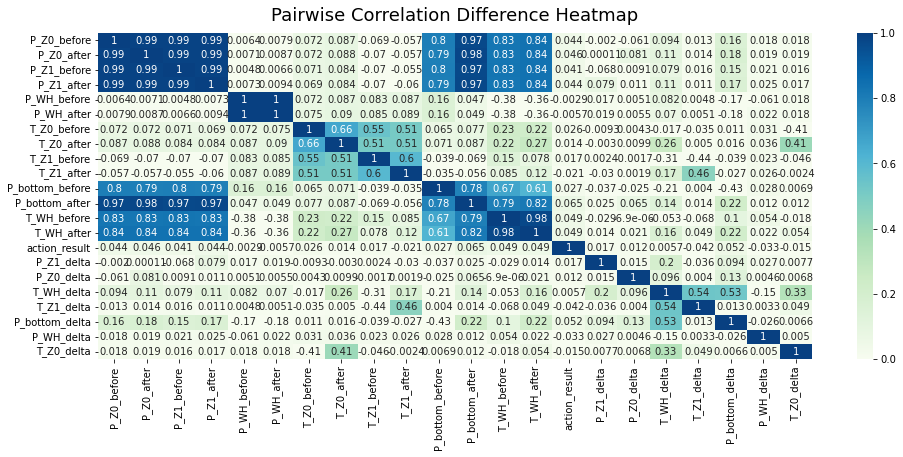

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_no_action.corr(), vmin=0, vmax=1, annot=True, cmap='GnBu')
heatmap.set_title('Pairwise Correlation Difference Heatmap', fontdict={'fontsize':18}, pad=12);

In [21]:
df_with_action = df_train[df_train['command_type_3'] == 0]
df_with_action = df_with_action[['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'action_result', 'P_Z1_delta', 'P_Z0_delta', 'T_WH_delta', 'T_Z1_delta',
       'P_bottom_delta', 'P_WH_delta', 'T_Z0_delta']]
df_with_action

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,...,T_WH_before,T_WH_after,action_result,P_Z1_delta,P_Z0_delta,T_WH_delta,T_Z1_delta,P_bottom_delta,P_WH_delta,T_Z0_delta
0,782.991774,781.513238,721.997335,732.645404,228.072793,222.739237,88.990443,88.017064,88.256267,91.844784,...,71.206940,72.954653,0,10.648068,-1.478536,1.747713,3.588516,-69.947280,-5.333556,-0.973379
2,783.162356,781.606394,727.905276,727.690796,224.554990,230.421390,89.138396,88.773388,89.711909,88.672596,...,72.559822,71.329930,1,-0.214480,-1.555962,-1.229892,-1.039313,-0.852047,5.866400,-0.365007
3,782.434641,799.091495,725.812266,725.502688,217.380665,222.701668,88.840552,89.561738,88.047662,87.951192,...,71.972874,68.481609,0,-0.309578,16.656854,-3.491265,-0.096470,-75.381007,5.321003,0.721186
4,845.024456,830.298714,778.727926,791.655508,105.516327,111.314215,85.680819,86.664650,89.330981,86.211135,...,81.582149,78.978201,1,12.927583,-14.725742,-2.603948,-3.119846,11.028805,5.797888,0.983832
6,797.246182,794.704745,735.573523,727.848710,229.520591,227.232952,89.869877,86.920913,90.413714,88.409987,...,73.684152,68.756552,1,-7.724813,-2.541437,-4.927600,-2.003728,-86.443054,-2.287639,-2.948964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,...,70.566993,64.813454,0,6.594787,-5.272653,-5.753539,0.137904,-45.014137,-5.500886,-1.794632
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,...,68.210562,73.542945,0,-2.145482,-15.854170,5.332383,2.250041,37.107424,-4.365773,-0.866476
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,...,73.289724,71.450532,0,-10.097390,-2.068311,-1.839192,0.068890,-4.265735,2.980780,-2.280765
9998,850.027606,845.226598,774.510375,793.817333,115.348739,110.382150,87.331351,89.311389,84.625393,85.116316,...,80.092350,78.105941,0,19.306958,-4.801008,-1.986409,0.490923,-101.104098,-4.966590,1.980038


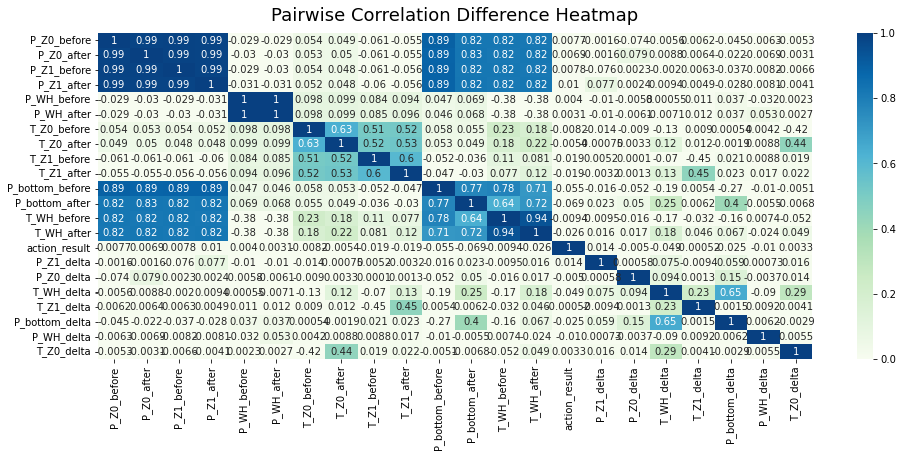

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_with_action.corr(), vmin=0, vmax=1, annot=True, cmap='GnBu')
heatmap.set_title('Pairwise Correlation Difference Heatmap', fontdict={'fontsize':18}, pad=12);